In [1]:
%pylab inline
import ThonkTools as TT
from uncertainties import unumpy as unp
from uncertainties import ufloat
from scipy import interpolate
from scipy.optimize import curve_fit

Populating the interactive namespace from numpy and matplotlib


In [2]:
def csvReader(x):
    """
        csvReader takes a csv file and creats a list with lists of the colloms.
        It also turns strings into numbers if possible.
    """
    import csv
    with open(x, 'r') as csvFile:
        reader = csv.reader(csvFile)
        l = None
        for row in reader:
            if l == None:
                l = [[] for i in range(len(row))]
                for i in range(len(l)):
                    try:
                        try:
                            l[i].append(float(row[i]))
                        except:
                            l[i].append(row[i])
                    except:
                        None
            else:
                for i in range(len(l)):
                    try:
                        try:
                            l[i].append(float(row[i]))
                        except:
                            l[i].append(row[i])
                    except:
                        None
    return l    
    csvFile.close()

In [7]:
data_1 = csvReader('lockin_2.csv')
data_2 = csvReader('lockin_3.csv')
data_3 = csvReader('lockin_4.csv')
data_4 = csvReader('lockin_5.csv')
data_5 = csvReader('lockin_6.csv')
data_6 = csvReader('lockin_7.csv')
data_7 = csvReader('lockin_8.csv')
data_8 = csvReader('lockin_9.csv')

In [380]:
def sägezahn1(x):
    y = x[2][2:]
    x = x[0][2:]
    for i in range((len(x))):
        if abs(y[i] - y[i+1]) > 5:
            minimum = y[i+1]
            break
        else:
            None
    k = y.index(minimum)
    y = y[k:] #minimum von x bei x[0]
    x = x[k:]
    l = y.index(max(y))
    y = y[:l]
    x = x[:l]
    xnew,ynew = TT.linfit(x,y)
    k = TT.linfit_pm(x,y)
    return xnew, ynew, k

def gausfit_ab(x, y, p0=None, r=None, d=None):
    import numpy as np
    return TT.fit(x, y, func=lambda x, a, b, c, d: (a * (x - b) * e**(- (x - b)**2 / (2 * c**2))) / c**2 + d, r=r, d=d, p0=p0)
    
def gausfit_ab_pm(x, y, p0=None):
    import numpy as np
    return TT.fit_pm(x, y, func=lambda x, a, b, c, d: (a * (x - b) * e**(- (x - b)**2 / (2 * c**2))) / c**2 + d, p0=p0)

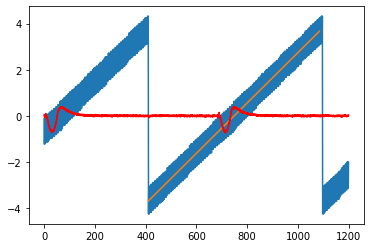

In [401]:
k = data_1
k2 = sägezahn(k)
plt.plot(k[0][2:],k[2][2:])
plt.plot(k2[0],k2[1])
plt.plot(k[0][2:],k[1][2:],color='red')

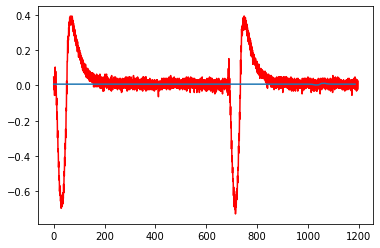

In [402]:
plt.plot(k[0][2:1200],k[1][2:1200],color='red')
xnew, ynew = gausfit_ab(k[0][2:1200],k[1][2:1200],p0=(0.10,1020,20,0))
plt.plot(xnew,ynew)

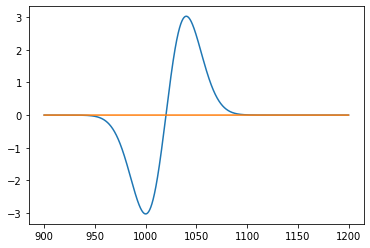

In [399]:
a = 100 #
b = 1020 #nulldurchgang
#d = 1#höhe der nulllunie
c = 20 #breite des minimums
#y = - (a * (x - b) * e**(- (x - b)**2 / (2 * c**2))) / c**2 + d
x = arange(900,1200,0.1)
plt.plot(x, (a * (x - b) * e**(- (x - b)**2 / (2 * c**2))) / c**2)
plt.plot(x,0*x)